In [1]:

import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Fetch the Boston housing dataset from the original source
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Select a subset of features, e.g., the first three features
X_subset = data[:, :3]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_subset, target, test_size=0.2, random_state=42)

# Create a TensorFlow linear regression model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(X_subset.shape[1],))
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2314.1926
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2402.7922
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2151.3579
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2126.1658
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1899.8523
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1868.7163
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1790.3455
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1644.0629
Epoch 9/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1689.4340
Epoch 10/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1545.7260
Epoch 11/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1364.8859
Epoch 12/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1487.4370
Epoch 13/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1210.4653
Epoch 14/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1322.4520
Epoch 15/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Mean Absolute Percentage Error (MAPE): 0.5136816411025273


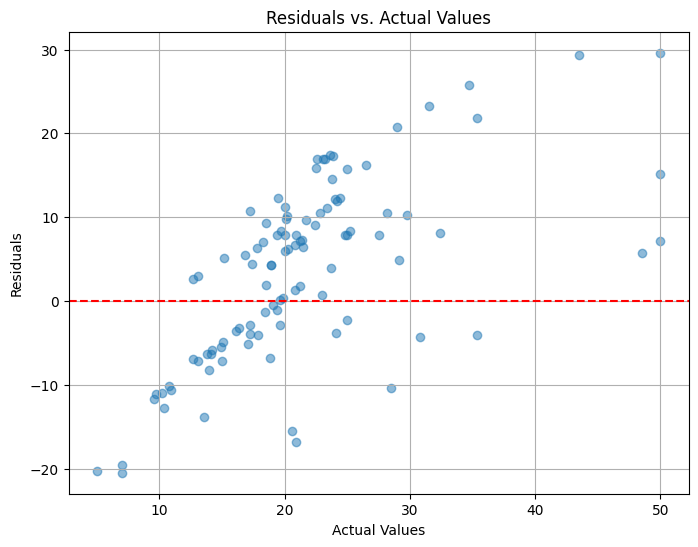

In [2]:
# prompt: show me the MAPE and also visualize results like residuals vs actuals

from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred = model.predict(X_test).flatten()

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

# Calculate residuals
residuals = y_test - y_pred

# Visualize residuals vs actuals
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Actual Values')
plt.grid(True)
plt.show()


Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 519.2269 - val_loss: 345.7930
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 375.9564 - val_loss: 241.4336
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 311.3663 - val_loss: 187.9055
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 252.2290 - val_loss: 167.8129
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 276.2356 - val_loss: 155.0093
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 225.9115 - val_loss: 146.1279
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 199.9663 - val_loss: 146.3475
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 176.2062 - val_loss: 136.8872
Epoch 9/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 182.9988 - val_loss: 131.1293
Epoch 10/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 186.8533 - val_loss: 131.6859
Epoch 11/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 170.9668 - val_loss: 126.7447
Epoch 12/200
11/11 ━━━━━━━━━

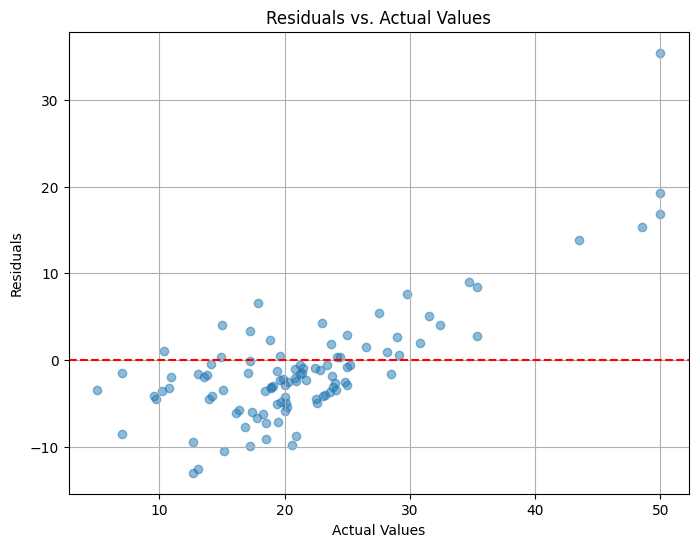

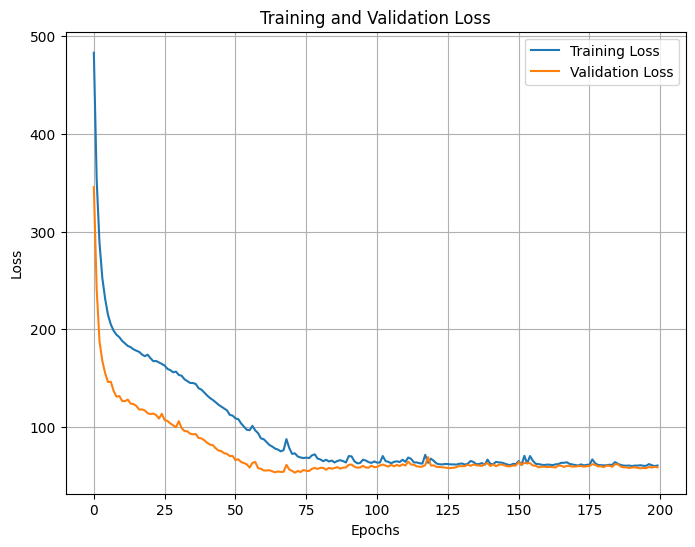

In [3]:
# prompt: can we try to build a better model?

import matplotlib.pyplot as plt
# Add more layers and neurons to the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_subset.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer
])

# Compile the model with a potentially different optimizer and learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model with more epochs and potentially a different batch size
history = model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=1, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions on the test data
y_pred = model.predict(X_test).flatten()

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

# Calculate residuals
residuals = y_test - y_pred

# Visualize residuals vs actuals
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Actual Values')
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()
